In [106]:
import sys
sys.path.append('../src')
import util
import logit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import gridspec
%matplotlib inline

In [107]:
def make_heatmap(ax, Z, title="Log-likelihood", step=0.025):
    ps = np.arange(1.0, -step, -step)
    rs = np.arange(0.0, 1.0 + step, step)
    X, Y = np.meshgrid(ps, rs)
    i, j = np.unravel_index(np.nanargmin(Z), Z.shape)  # get empirical minimum
    # make the plot
    ax.imshow(Z, cmap=cm.coolwarm)
    ax.set_xticks(np.arange(0, (1.0/step) + 0.05, (1.0/step)/4))
    ax.set_xticklabels(np.arange(0.0, 1.05, 0.25))
    ax.set_yticks(np.arange(0,  (1.0/step) + 0.05, (1.00/step)/4))
    ax.set_yticklabels(np.arange(1, -.01, -0.25))
    ax.set_xlabel(r'$r$')
    ax.set_ylabel(r'$p$')
    ax.plot(j, i, 'o', color='black')  # empirical max
    ax.set_title(title)

In [112]:
# read data
from env import data_path
D = util.read_data_single(data_path + '/flickr-growth_choices_py.csv', max_deg=None)

In [113]:
# 1) single log-degree
m = logit.LogDegreeModel('flickr', D=D, vvv=2)
m.fit()
print("LL = ", m.ll())

[flickr] fitting with BFGS
[flickr] parameters after fitting: [1.]
LL =  9963.483104114674


In [114]:
# 2a) 2-mode mixed logit (just p)
m = logit.MixedLogitModel('flickr', D=D, vvv=2)
m.add_uniform_model()
m.add_log_degree_model()
T = m.fit(etol=0.01, n_rounds=200, return_stats=True)
print("LL = ", m.ll())

[flickr] [  0/200] (u) pi_1=0.210 u_1=1.00 (ld) pi_2=0.790 u_2=1.37 (*) tot_ll=7330.5957
[flickr] delta in ll (0.003) < etol (0.010), stopping
[flickr] u's  = [(u:1.000), (ld:1.211)]
[flickr] pi's = [(u:0.094), (ld:0.906)]
LL =  7178.076181582004


In [115]:
# 2b) clamped 2-mode mixed logit (just p)
m = logit.MixedLogitModel('flickr', D=D, vvv=2)
m.add_uniform_model()
m.add_log_degree_model(bounds=((1, 1),))
T = m.fit(etol=0.01, n_rounds=200, return_stats=True)
print("LL = ", m.ll())

[flickr] [  0/200] (u) pi_1=0.210 u_1=1.00 (ld) pi_2=0.790 u_2=1.00 (*) tot_ll=7507.1521
[flickr] delta in ll (0.005) < etol (0.010), stopping
[flickr] u's  = [(u:1.000), (ld:1.000)]
[flickr] pi's = [(u:0.077), (ld:0.923)]
LL =  7280.324013222918


In [116]:
# 3) 2-mode mixed logit (just r)
m = logit.MixedLogitModel('flickr', D=D, vvv=2)
m.add_uniform_model()
m.add_uniform_fof_model()
T = m.fit(etol=0.01, n_rounds=200, return_stats=True)
print("LL = ", m.ll())

[flickr] [  0/200] (u) pi_1=0.157 u_1=1.00 (uf) pi_2=0.843 u_2=1.00 (*) tot_ll=5410.3518
[flickr] delta in ll (0.001) < etol (0.010), stopping
[flickr] u's  = [(u:1.000), (uf:1.000)]
[flickr] pi's = [(u:0.046), (uf:0.954)]
LL =  5162.5879483443905


In [104]:
# 4) 4-mode mixed logit (p vs r)
m = logit.MixedLogitModel('flickr', D=D, vvv=2)
m.add_uniform_model()
m.add_log_degree_model()
m.add_uniform_fof_model()
m.add_log_degree_fof_model()
T = m.fit(etol=0.01, n_rounds=200, return_stats=True)
print("LL = ", m.ll())

[flickr] [  0/200] (u) pi_1=0.080 u_1=1.00 (ld) pi_2=0.242 u_2=1.37 (uf) pi_3=0.335 u_3=1.00 (ldf) pi_4=0.344 u_4=1.06 (*) tot_ll=26993.7819
[flickr] [ 10/200] (u) pi_1=0.026 u_1=1.00 (ld) pi_2=0.095 u_2=1.22 (uf) pi_3=0.426 u_3=1.00 (ldf) pi_4=0.452 u_4=1.10 (*) tot_ll=25817.3074
[flickr] [ 30/200] (u) pi_1=0.027 u_1=1.00 (ld) pi_2=0.068 u_2=1.12 (uf) pi_3=0.409 u_3=1.00 (ldf) pi_4=0.496 u_4=1.11 (*) tot_ll=25786.3987
[flickr] [ 40/200] (u) pi_1=0.027 u_1=1.00 (ld) pi_2=0.067 u_2=1.12 (uf) pi_3=0.406 u_3=1.00 (ldf) pi_4=0.500 u_4=1.10 (*) tot_ll=25786.1567
[flickr] delta in ll (0.008) < etol (0.010), stopping
[flickr] u's  = [(u:1.000), (ld:1.118), (uf:1.000), (ldf:1.100)]
[flickr] pi's = [(u:0.027), (ld:0.067), (uf:0.406), (ldf:0.500)]


In [117]:
# 5) clamped 4-mode mixed logit (p vs r)
m = logit.MixedLogitModel('flickr', D=D, vvv=2)
m.add_uniform_model()
m.add_log_degree_model(bounds=((1, 1),))
m.add_uniform_fof_model()
m.add_log_degree_fof_model(bounds=((1, 1),))
T = m.fit(etol=0.01, n_rounds=200, return_stats=True)
print("LL = ", m.ll())

[flickr] [  0/200] (u) pi_1=0.075 u_1=1.00 (ld) pi_2=0.242 u_2=1.00 (uf) pi_3=0.337 u_3=1.00 (ldf) pi_4=0.346 u_4=1.00 (*) tot_ll=4722.4798
[flickr] [ 10/200] (u) pi_1=0.020 u_1=1.00 (ld) pi_2=0.078 u_2=1.00 (uf) pi_3=0.409 u_3=1.00 (ldf) pi_4=0.494 u_4=1.00 (*) tot_ll=4436.3537
[flickr] [ 20/200] (u) pi_1=0.021 u_1=1.00 (ld) pi_2=0.066 u_2=1.00 (uf) pi_3=0.390 u_3=1.00 (ldf) pi_4=0.523 u_4=1.00 (*) tot_ll=4433.7110
[flickr] delta in ll (0.008) < etol (0.010), stopping
[flickr] u's  = [(u:1.000), (ld:1.000), (uf:1.000), (ldf:1.000)]
[flickr] pi's = [(u:0.021), (ld:0.064), (uf:0.385), (ldf:0.529)]
LL =  4433.595893695425


In [118]:
# 6) 2*2 mixed logit (p vs r)
step = 0.025
ps = np.arange(1.0, -step, -step)
rs = np.arange(0.0, 1.0 + step, step)
X, Y = np.meshgrid(ps, rs)
Z = np.sqrt(X**2 + Y**2)  # to initialize the meshgrid
m = logit.MixedLogitModel('flickr', D=D, vvv=0)
m.add_uniform_model()
m.add_log_degree_model(bounds=((1, 1),))  # clamped at alpha=1 (full PA)
m.add_uniform_fof_model()
m.add_log_degree_fof_model(bounds=((1, 1),)) # clamped at alpha=1 (full PA)
for i in range(len(ps)):
    for j in range(len(rs)):
        p = ps[i]
        r = rs[j]
        m.pk = {0: (1-p)*r, 1: p*r, 2: (1-p)*(1-r), 3: p*(1-r)}
        Z[i, j] = m.ll()

min is ll=4439.32 at r=0.08 p=0.62
max is ll=16094.38 at r=1.00 p=-0.00


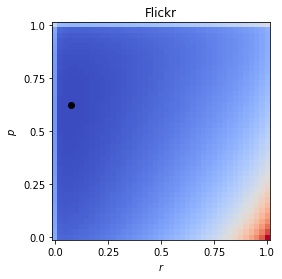

In [119]:
f, ax = plt.subplots()
make_heatmap(ax, Z, title="Flickr", step=step)

i, j = np.unravel_index(np.nanargmin(Z), Z.shape)
print('min is ll=%.2f at r=%.2f p=%.2f' % (Z[i, j], rs[j], ps[i]))
i, j = np.unravel_index(np.nanargmax(Z), Z.shape)
print('max is ll=%.2f at r=%.2f p=%.2f' % (Z[i, j], rs[j], ps[i]))

In [ ]:
print('  p  r ' + ' '.join([" %.2f" % rs[j] for j in range(11)]))
for i in range(11):
    print(" %.2f  " % ps[i] + ' '.join(["%d" % Z[i,j] for j in range(11)]))